## Hypothesis Testing Problems

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import norm
from math import sqrt

In [12]:
def t_score(sample_size, sample_mean, pop_mean, sample_std):
    numerator = sample_mean - pop_mean
    denomenator = sample_std / sqrt(sample_size)
    return numerator / denomenator

## Understand Hypothesis Testing

Step-1:

Alternate Hypothesis (Bold claim): $ H_1 \ \Rightarrow \ \gt, \ \lt, \ \neq  $   \
Null Hypothesis (Status Quo): $ H_0 \ \Rightarrow \ \leq, \ \geq, \ = $

Step - 2:

 - Collect a sample of size n
 - Compute the mean from this sample $ \bar{x} $
 
Step - 3: Compute Test Statistic:
 
 - If population variance is known   $$ z = \frac{\bar{x} - \mu}{\sigma/\sqrt[2]{n}}$$

 - If population variance is unknown  $$ t = \frac{\bar{x} - \mu}{s/\sqrt[2]{n}} $$
 
Step - 4: 

Decide significance level $ \alpha $. Lower $ \alpha $ means you need stronger evidence to reject Null Hypothesis.

Step - 5.1: Apply decision rule:

If test statistic is z-score -

 - Two tailed z-test:$$ |z| > z_\frac{\alpha}{2} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0$$
 - Right tailed z-test:$$ z > z_\alpha \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
 - Left tailed z-test:$$ z < -z_\alpha \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
 - If test statistic is t-score

 - Two tailed t-test:$$ |t| > t_{n-1,\frac{\alpha}{2}} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
 - Right tailed t-test:$$ t > t_{n-1,\alpha} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
 - Left tailed t-test:$$ t < t_{n-1,\alpha} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
 
Step - 5.2: Compute p-value $ P(Test \ Statistics | H_0) $

 - For two tailed test:$$ p \ value = 2 * (1.0 - cdf(test \ statistic)) $$
 - For one tailed test:$$ p \ value = (1.0 - cdf(test \ statistic)) $$Now,$$ if (p \ value < \alpha) \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$

### 1Q. Pista House selling Hyderabadi Chicken Dum biryani claims that each parcel packet has 500 grams of biryani (also mentioned on the label of packet). You are sceptic of their claims and believe that on average each packet does not contain 500 grams of biryani. How do you prove your claim? 

Step - 1:
Alternate Hypothesis (Bold claim):$$ H_1: \ ? $$ \ Null Hypothesis (Status Quo):$$ H_0: \ ? $$

Step - 2:

Collect a sample of size n = 10$$ [490, 220, 470, 500, 495, 496, 496, 498, 508, 480] $$
Compute sample mean$$ \bar{x} \ = \ ? $$
Step - 3: Compute Test Statistic:$$ t = \frac{\bar{x} - \mu}{s/\sqrt[2]{n}} $$

Step - 4: Decide $ \alpha $ or significance level

Step - 5.1: ? tailed t-test:$$ reject \ H_0 \ if \ ? $$

Step - 5.2: Compute p-value

In [8]:
l = [490, 220, 470, 500, 495, 496, 496, 498, 508, 480]

sum(l)/len(l)

465.3

In [14]:
# implementing the two tailed test method for calculating the t_critical 
from scipy.stats import t
alpha = 1 - 0.95

t_critical = t.ppf(1-alpha/2, df = 9)

print(t_critical)

2.2621571627409915


In [10]:
# Defining the sample and population parameters

sample_size = 10
sample_mean = 465.3
pop_mean = 500
pop_std = 50

In [15]:
sample_std = np.std(l)
sample_std

82.3918078451978

In [18]:
# Calculate t-score

t = t_score(sample_size, sample_mean, pop_mean, sample_std)
print(t)

-1.3318197242863192


Text(465.3, 0.0007, 'x_bar')

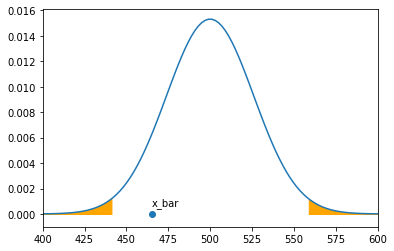

In [19]:
# Ploting the sampling distribution with rejection regions

# Defining the x minimum and x maximum
x_min = 400
x_max = 600


# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = sample_std / sqrt(sample_size)


# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Computing the left and right critical values (Two tailed Test)
t_critical_left = pop_mean + (-t_critical * std)
t_critical_right = pop_mean + (t_critical * std)


# Shading the left rejection region
x1 = np.linspace(x_min, t_critical_left, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')


# Shading the right rejection region
x2 = np.linspace(t_critical_right, x_max, 100)
y2 = norm.pdf(x2, mean, std)
plt.fill_between(x2, y2, color='orange')


# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.0007))



In [20]:
if(np.abs(t) > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


In [21]:
# Conclusion using p test

p_value = 2 * (1.0 - norm.cdf(np.abs(t)))

print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.18291943486353945
Fail to reject Null Hypothesis


### Q2: You have developed a new Natural Language Processing Algorithms and done a user study. You claim that the average rating given by the users is greater than 4 on a scale of 1 to 5. How do you prove this to your client?

Step - 1:
Alternate Hypothesis (Bold Claim):$$ H_1: \ ? $$Null Hypothesis (Status Quo):$$ H_0: \ ? $$

Step - 2:

Collect a sample of size n = 10$$ [4, 3, 5, 4, 5, 3, 5, 5, 4, 2, 4, 5, 5, 4, 4, 5, 4, 5, 4, 5] $$
Compute sample mean$$ \bar{x} \ = \ ? $$
Step - 3: Compute Test Statistic: $$ t = \frac{\bar{x} - \mu}{s/\sqrt[2]{n}} $$

Step - 4: Decide $ \alpha $

Step - 5.1: ? tailed t-test:$$ reject \ H_0 \ if ? $$

Step - 5.2: Compute p-value

In [22]:
l = [4,3,5,4,5,3,5,5,4,2,4,5,5,4,4,5,4,5,4,5]
sum(l)/len(l)

4.25

In [23]:
## Implementing the one tail method for calculating the t_critical 

from scipy.stats import t

alpha = 1 - 0.95

t_critical = t.ppf(1-alpha, df = 19)

print(t_critical)

1.729132811521367


In [24]:
sample_std = np.std(l)
sample_std

0.82915619758885

In [25]:
sample_size = 20
sample_mean = 4.25
pop_mean = 4
sample_std = 0.82

In [26]:
t = t_score(sample_size, sample_mean, pop_mean, sample_std)

print(t)

1.3634560838413352


Text(4.25, 0.1, 'x_bar')

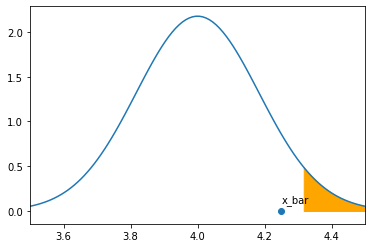

In [27]:
# Ploting the sampling distribution with rejection regions

# Defining the x minimum and x maximum
x_min = 3.5
x_max = 4.5


# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = sample_std / sqrt(sample_size)


# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Computing the right critical value (Right tailed Test)
t_critical_right = pop_mean + (t_critical * std)


# Shading the right rejection region
x1 = np.linspace(t_critical_right, x_max, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')


# Ploting the sample mean and concluding the results 

plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.1))

In [28]:
# Conclusion using z test

if(t > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


In [29]:
# Conclusion using p test

p_value = 1.0 - norm.cdf(np.abs(t))

print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.08636940802398319
Fail to reject Null Hypothesis


### 3Q: TATA has developed a better fuel management system for the SUV segment. They claim that with this system, on average the SUV's mileage is at least 15 km/litre?

Step - 1:
Alternate Hypothesis (Bold Claim):$$ H_1: \ ? $$Null Hypothesis (Status Quo):$$ H_0: \ ? $$

Step - 2:

Collect a sample of size n = 10$$ [14.08, 14.13, 15.65, 13.78, 16.26, 14.97, 15.36, 15.81, 14.53, 16.79, 15.78, 16.98, 13.23, 15.43, 15.46, 13.88, 14.31, 14.41, 15.76, 15.38] $$
Compute sample mean$$ \bar{x} \ = \ ? $$
Step - 3: Compute Test Statistic:$$ t = \frac{\bar{x} - \mu}{s/\sqrt[2]{n}} $$

Step - 4: Decide $ \alpha $

Step - 5.1: ? tailed t-test:$$ reject \ H_0 \ if \ ? $$

Step - 5.2: Compute p-value

In [30]:
l = [14.08,14.13,15.65,13.78,16.26,14.97,15.36,15.81,14.53,16.79,15.78,16.98,13.23,15.43,15.46,13.88,14.31,14.41,15.76,15.38]
sum(l)/len(l)

15.098999999999998

In [31]:
sample_std = np.std(l)
sample_std

0.9994043225842081

In [32]:
## Implementing the one tail method for calculating the t_critical 

from scipy.stats import t

alpha = 1 - 0.95

t_critical = t.ppf(1-alpha, df = 19)

print(t_critical)

1.729132811521367


In [33]:
sample_size = 20
sample_mean = 15.1
pop_mean = 15
sample_std = 0.99

In [34]:
t = t_score(sample_size, sample_mean, pop_mean, sample_std)

print(t)

0.4517309045454104


Text(15.1, 0.1, 'x_bar')

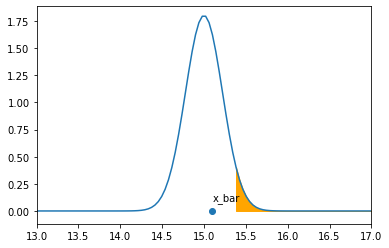

In [35]:
x_min = 13
x_max = 17

mean = pop_mean
std = sample_std / sqrt(sample_size)

x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)

plt.xlim(x_min, x_max)
#plt.ylim(0, 0.03)

plt.plot(x, y)

t_critical_right = pop_mean + (t_critical * std)

x1 = np.linspace(t_critical_right, x_max, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')

plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.1))

In [ ]:
if(t > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

In [ ]:
p_value = 1.0 - norm.cdf(np.abs(t))

print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

### 4Q: You have developed a new Machine Learning Application and claim that on average it takes less than 100 ms to predict for any future datapoint. How do you convince your client about this claim?

Step - 1:
Alternate Hypothesis (Bold Claim):$$ H_1: \ ? $$Null Hypothesis (Status Quo):$$ H_0: \ ? $$

Step - 2:

Collect a sample of size n = 100
Compute sample mean$$ \bar{x} \ = \ 97.5 $$
Step - 3: Compute Test Statistic:$$ t = \frac{\bar{x} - \mu}{s/\sqrt[2]{n}} $$

Step - 4: Decide $ \alpha $

Step - 5.1: ? tailed t-test:$$ reject \ H_0 \ if \ ? $$

Step - 5.2: Compute p-value

In [36]:
## implementing the one tail test to calculate the t_critical value

from scipy.stats import t

alpha = 1 - 0.99

t_critical = t.ppf(1 - alpha, df=19)

print(t_critical)

2.539483190622288


In [37]:
sample_size = 100
sample_mean = 97.5
pop_mean = 100
sample_std = 8

In [38]:
t = t_score(sample_size, sample_mean, pop_mean, sample_std)

print(t)

-3.125


Text(97.5, 0.02, 'x_bar')

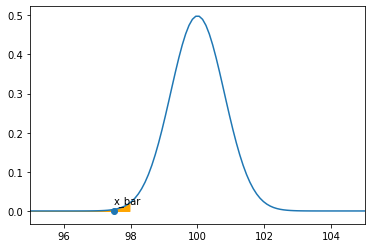

In [39]:
x_min = 95
x_max = 105

mean = pop_mean
std = sample_std / sqrt(sample_size)

x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)

plt.xlim(x_min, x_max)
# plt.ylim(0, 0.03)

plt.plot(x, y)

t_critical_left = pop_mean + (-t_critical * std)

x1 = np.linspace(x_min, t_critical_left, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')

plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.02))

In [40]:
if(t < -t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Reject Null Hypothesis


In [41]:
p_value = 1.0 - norm.cdf(np.abs(t))

print("p_value = ", p_value)

if(p_value < 0.01):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.0008890252991083925
Reject Null Hypothesis
